In [1]:
library(ggplot2)
library(dplyr)
library(RColorBrewer)
library(ggthemes)
library(karyoploteR)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: regioneR

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, uns

In [2]:
BM1 <- read.delim("/gpfs/gsfs12/users/wangy80/TK117/results/03map_reads2/filter/BM-1.w100000_s50000.txt",sep="\t",header=F)
BM21 <- read.delim("/gpfs/gsfs12/users/wangy80/TK117/results/03map_reads2/filter/BM-21.w100000_s50000.txt",sep="\t",header=F)
BM24 <- read.delim("/gpfs/gsfs12/users/wangy80/TK117/results/03map_reads2/filter/BM-24.w100000_s50000.txt",sep="\t",header=F)
BM3 <- read.delim("/gpfs/gsfs12/users/wangy80/TK117/results/03map_reads2/filter/BM-3.w100000_s50000.txt",sep="\t",header=F)
BM4 <- read.delim("/gpfs/gsfs12/users/wangy80/TK117/results/03map_reads2/filter/BM-4.w100000_s50000.txt",sep="\t",header=F)
BM5 <- read.delim("/gpfs/gsfs12/users/wangy80/TK117/results/03map_reads2/filter/BM-5.w100000_s50000.txt",sep="\t",header=F)
BM6 <- read.delim("/gpfs/gsfs12/users/wangy80/TK117/results/03map_reads2/filter/BM-6.w100000_s50000.txt",sep="\t",header=F)
BM7 <- read.delim("/gpfs/gsfs12/users/wangy80/TK117/results/03map_reads2/filter/BM-7.w100000_s50000.txt",sep="\t",header=F)
BMS <- read.delim("/gpfs/gsfs12/users/wangy80/TK117/results/03map_reads2/filter/BM-S.w100000_s50000.txt",sep="\t",header=F)
BM46 <- read.delim("/gpfs/gsfs12/users/wangy80/TK117/results/03map_reads2/filter/BM-46.w100000_s50000.txt",sep="\t",header=F)

In [3]:
names(BM1) <- c("chr","start","end","count")
BM1$class <- "BM1"
names(BM21) <- c("chr","start","end","count")
BM21$class <- "BM21"
names(BM24) <- c("chr","start","end","count")
BM24$class <- "BM24"
names(BM3) <- c("chr","start","end","count")
BM3$class <- "BM3"
names(BM4) <- c("chr","start","end","count")
BM4$class <- "BM4"
names(BM5) <- c("chr","start","end","count")
BM5$class <- "BM5"
names(BM6) <- c("chr","start","end","count")
BM6$class <- "BM6"
names(BM7) <- c("chr","start","end","count")
BM7$class <- "BM7"
names(BMS) <- c("chr","start","end","count")
BMS$class <- "BMS"
names(BM46) <- c("chr","start","end","count")
BM46$class <- "BM46"


In [4]:
res <- rbind(BM1,BM21,BM24,BM3,BM4,BM5,BM6,BM7,BMS,BM46)

In [5]:
res <- rbind(BM1,BM21,BM24,BM4,BM46,BM5,BM6)

In [6]:
head(res)

,chr,start,end,count,class
,<chr>,<int>,<int>,<int>,<chr>
1,2L,0,100000,1,BM1
2,2L,50000,150000,1,BM1
3,2L,100000,200000,3,BM1
4,2L,150000,250000,3,BM1
5,2L,200000,300000,0,BM1
6,2L,250000,350000,2,BM1


In [7]:
res <- res[which(res$chr == "2L" | res$chr == "2R" |
    res$chr == "3L" | res$chr == "3R" | res$chr == "4" | res$chr ==
    "X" | res$chr == "Y"), ]

In [8]:
# Plot
p <- ggplot(res, aes(x = start, y = count, color = class)) +
    facet_wrap(~chr, ncol = 1) + geom_line() + labs(x = "Location", y = "count",title = "") + 
    scale_color_brewer(palette = "Paired") +
    theme_few()

In [9]:
table(res$chr)


  2L   2R   3L   3R    4    X    Y 
3297 3542 3941 4494  189 3297  518 

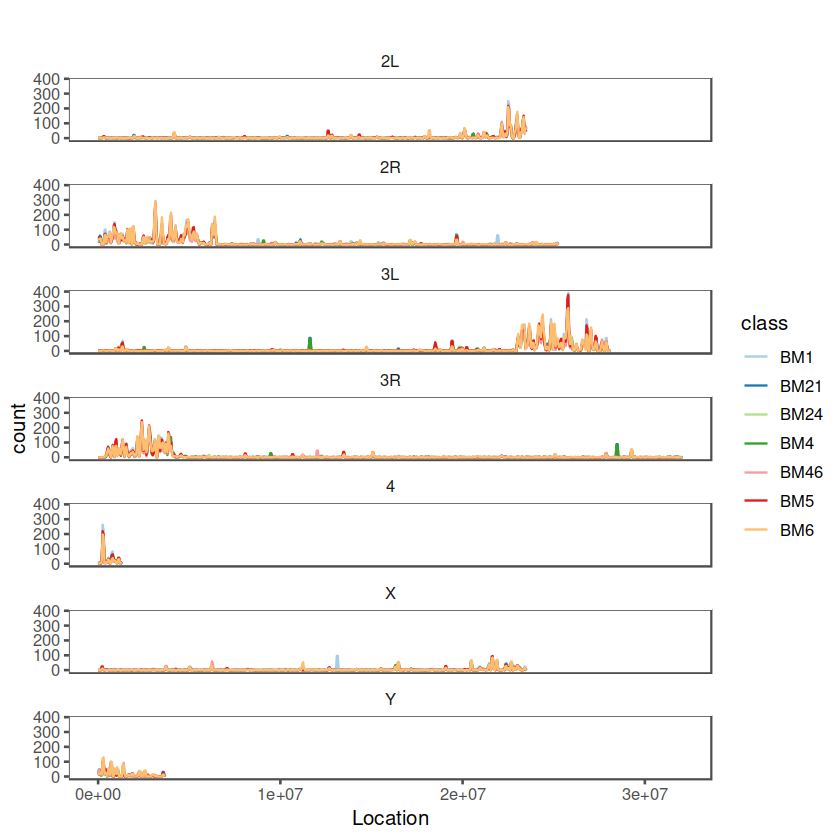

In [10]:
p

In [11]:
ggsave(filename = paste0("w100000_s50000", ".pdf"), plot = p, path = "./",  width = 20, height = 10)


In [12]:
lists <- c("BM1","BM21","BM24","BM4","BM46","BM5","BM6")

In [14]:
for (i in 1:length(lists)) {
    pdf(paste0("w100000_s50000_",lists[i], "_line_kp",".pdf"), width = 20, height = 10)
    data <- get(lists[i])
    kp <- plotKaryotype(genome = "dm6", plot.type = 1, main = lists[i])
    kpLines(kp, chr = paste0("chr",data$chr), x = data$start, y = data$count, col = "#AA88FF", r0 = 0, r1 = 1, ymin=0,ymax=300)
    #kpAxis(kp,  r0 = 0, r1 = 1, col = "gray50", cex = 1)
    dev.off()
}